<a href="https://colab.research.google.com/github/FeedingDejaj/MAT422/blob/main/1_3_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.3 - Linear Regression
By Abdula Alkhafaji



---



### **1.3.1 QR Decomposition:** a way to break down a matrix into two simpler matrices.

1. Q is an orthogonal matrix, meaning its columns are perpendicular (at right angles) to each other, and each column has a length of 1.

2. R is an upper triangular matrix, meaning all its entries below the diagonal are zero.

![Image](https://media.geeksforgeeks.org/wp-content/uploads/20221207110618/tma.jpg)



- This decomposition is useful in solving systems of linear equations and other numerical methods. It's called "QR" because you are factoring a matrix A into A=QR.

- In simpler terms, you’re splitting a matrix into one matrix that just rotates things (Q) and another matrix that scales them (R).

In [2]:
import numpy as np

def qr_decomposition(A):

  # Calculate the QR decomposition using numpy's built-in function
  Q, R = np.linalg.qr(A)

  return Q, R

# Example usage
A = np.array([[1, 2], [3, 4]])
Q, R = qr_decomposition(A)

print("Matrix A:")
print(A)
print("\nMatrix Q:")
print(Q)
print("\nMatrix R:")
print(R)
print("\nQ * R:")
print(np.dot(Q, R))  # Verify that Q * R = A


Matrix A:
[[1 2]
 [3 4]]

Matrix Q:
[[-0.31622777 -0.9486833 ]
 [-0.9486833   0.31622777]]

Matrix R:
[[-3.16227766 -4.42718872]
 [ 0.         -0.63245553]]

Q * R:
[[1. 2.]
 [3. 4.]]




---



### **1.3.2 Method of Least-Squares:** a way to find the best solution to a system of equations when an exact solution doesn't exist.

Instead of solving the system exactly, we aim to find the solution that minimizes the overall error.

1. We have more equations than unknowns, and you can't solve them all perfectly. We want to minimize the difference/ error between the actual results and what the equations predict.

2. The least-squares method finds the solution that makes the total squared error as small as possible. In other words, it finds the "closest" solution to the system that fits all the equations as well as possible.

3. If you have a system like ***Ax=b*** , the least-squares solution finds an ***x*** that minimizes the difference between ***Ax*** and ***b***, making the total error as small as possible.

Intercept: 1.2999999999999985
Slope: 0.9000000000000004
Predicted value for x = 6: 6.700000000000001


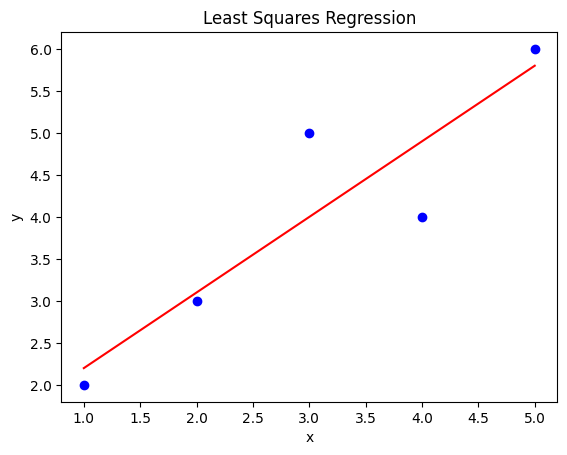

In [3]:
import numpy as np

# Example data
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 3, 5, 4, 6])

# Create the design matrix (add a column of ones for the intercept)
X = np.vstack([np.ones(len(x)), x]).T

# Calculate the coefficients using the normal equations
# (X^T * X)^-1 * X^T * y
beta = np.linalg.solve(X.T @ X, X.T @ y)

# Extract the intercept and slope
intercept = beta[0]
slope = beta[1]

print(f"Intercept: {intercept}")
print(f"Slope: {slope}")

# Now you can use the intercept and slope to predict new values
new_x = 6
predicted_y = intercept + slope * new_x
print(f"Predicted value for x = {new_x}: {predicted_y}")

# Visualization (optional)
import matplotlib.pyplot as plt
plt.scatter(x, y, color='blue')
plt.plot(x, intercept + slope * x, color='red')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Least Squares Regression")
plt.show()





---



### **1.3.3 Linear Regression:** method used to find the straight line that best fits a set of data points.

The idea is to predict one variable, y , based on another variable, x , by finding a line that models their relationship.

1. Finds the values of m and b that make the line fit the data points as closely as possible. To do this, it minimizes the total error. *This is often done using the least-squares method.*

## **𝐲 = 𝑋𝑤**

- X is the matrix of input data
- w is a vector of the weights (slope and intercept)
- y is the vector of predicted values.

We use the method of Least- Squares to try and get...

### **𝑿𝑤 ≈ 𝐲**

...where exact solutions may not exist. The least-squares approach finds the weights 𝑤 that result in the closest possible approximation.


Intercept: 1.4
Slope: 1.0


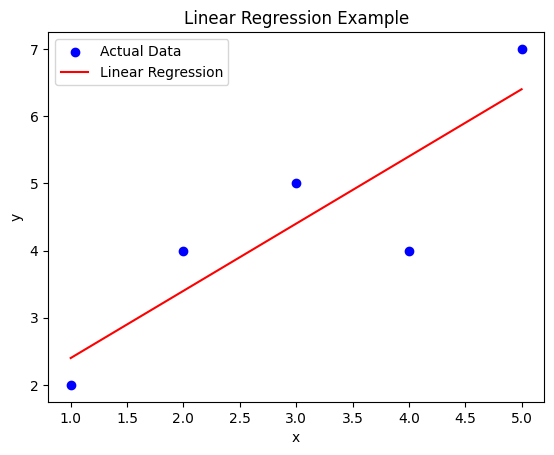

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some sample data
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 7])

# Create the design matrix (add a column of ones for the intercept)
X = np.vstack([np.ones(len(x)), x]).T

# Calculate the weights using the normal equations
# (X^T * X)^-1 * X^T * y
w = np.linalg.solve(X.T @ X, X.T @ y)

# Extract the intercept and slope
intercept = w[0]
slope = w[1]

print(f"Intercept: {intercept}")
print(f"Slope: {slope}")

# Predict the values using the model
y_pred = intercept + slope * x

# Visualize the results
plt.scatter(x, y, color='blue', label='Actual Data')
plt.plot(x, y_pred, color='red', label='Linear Regression')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression Example")
plt.legend()
plt.show()




---

